In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers


In [2]:
# 1. Load MNIST dataset
# ----------------------------------------------------
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten 28x28 → 784
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

In [3]:
# Encoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation="relu",
                activity_regularizer=regularizers.l1(1e-5))(input_img)  # sparsity
encoded = Dense(64, activation="relu")(encoded)
latent = Dense(32, activation="sigmoid")(encoded)  # compressed representation

In [4]:
# Decoder
decoded = Dense(64, activation="relu")(latent)
decoded = Dense(128, activation="relu")(decoded)
output_img = Dense(784, activation="sigmoid")(decoded)

In [5]:
# Autoencoder model
autoencoder = Model(input_img, output_img)

# Compile
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Train
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3899 - val_loss: 0.2578
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2572 - val_loss: 0.2541
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2526 - val_loss: 0.2454
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2446 - val_loss: 0.2404
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2405 - val_loss: 0.2377
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2375 - val_loss: 0.2353
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2353 - val_loss: 0.2340
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2341 - val_loss: 0.2328
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2335 - val_loss: 0.2322
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2328 - val_loss: 0.2315
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2310 - val_loss: 0.2193
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

In [6]:
# Reconstruct some digits
decoded_imgs = autoencoder.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


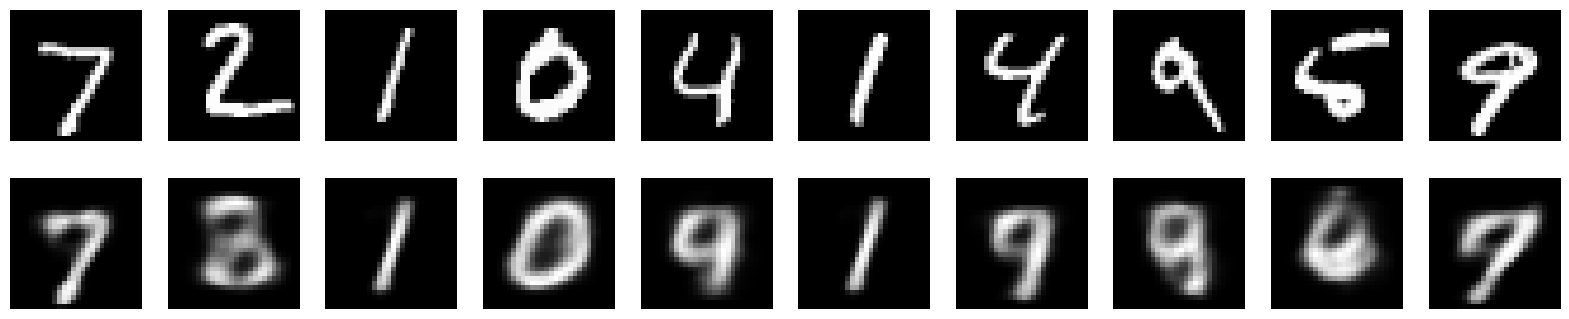

In [7]:
# Plot original vs reconstructed
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()